In [39]:
import numpy as np
%run Dolphins_data.ipynb
import sys
sys.path.append('../') # Change path
from Functions import * # Import Gradient_function
import math

In [40]:
## distance in Gradient_function and Loss_function is changes to np.linalg.norm(point_1 - point_2)
def Gradient_function(point_number,index,Y,point):
    alpha = 5 # Define Alpha
    gradient = 0 # Define gradient for the Gradient_function
    for m in range(len(Y)): # Run over all "edges"
        if ((Y[m][1] == point_number) or (Y[m][2] == point_number)): # Check to see if point_number is part of the edge
            connection = Y[m][0] # Check to see if there is a connection
            distance = np.linalg.norm(point[Y[m][1]] - point[Y[m][2]]) # Calculate the euclidean distance
            point_index_diff = (point[point_number][index] - point[Y[m][1]][index]) + (point[point_number][index] - point[Y[m][2]][index]) # Calculate point_a,i-point_b,i
            numerator = -2 * connection * point_index_diff * np.exp(-connection * (alpha - distance)) # Calculate the numerator
            denominator = 1 + np.exp(-connection * (alpha - distance)) # Calculate the denominator
            gradient += numerator / denominator # Calculate the fraction and plus all connection there is with point_number together
    return gradient 

def Loss_function(point,Y):
    alpha = 5 # Define Alpha
    result = 0 # Define result for the Loss_function

    for m in range(len(Y)): # Run over all "edges"
        connection = Y[m][0] # Check to see if there is a connection
        point_1 = point[Y[m][1]] # Define coordinates for vertex 1
        point_2 = point[Y[m][2]] # Define coordinates for vertex 2
        distance = np.linalg.norm(point_1 - point_2) # Calculate the euclidean distance
        sigmoid_value = 1 / (1 + np.exp(-connection * (alpha - distance))) # Calculate the sigmoid function
        result += np.log(sigmoid_value) # Sum all the probabilities 
    return result

In [45]:
n = 10 # Number of iterations
m = int(math.log2(1024)) # Length of dim_array
dim_array = [2**i for i in range(m+1)]
MLL = np.zeros(m+1) # Define the MLL
l = 0 

for dim in dim_array:
    mu = np.zeros(dim) # Define mean (mu) as a zero vector
    identity_matrix = np.eye(dim) # dim x dim identity matrix
    cov_matrix = 0.5 * identity_matrix + 0.5 # Define covariance matrix
    num_samples = 62  # Number of samples you want to generate

    points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)}
    
    for k in range(n):
        for i in range(1,num_samples+1): # Run over number of num_samples
            for j in range(dim): # Run over dimension
                points[i][j] += 0.1*Gradient_function(i,j,Y,points) # Use Gradient_function and take step=0.1*grad
    MLL[l] = Loss_function(points,Y) # Calcualte the probability using Loss_function
    l += 1

In [46]:
Loss_function(points,Y)

-1238.6565193570593

Text(0.5, 0, 'Iterration')

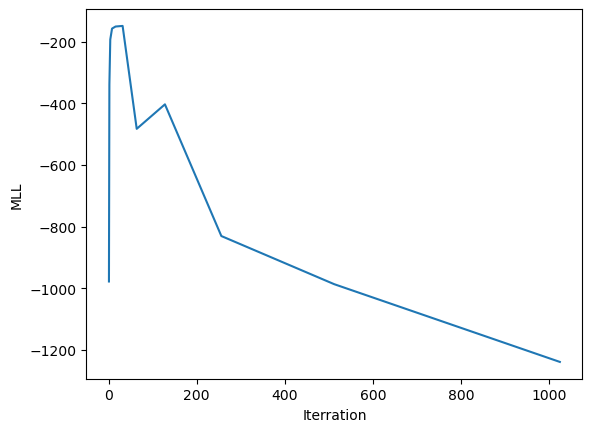

In [47]:
# Define x-axis values
x = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

plt.plot(x, MLL)
plt.ylabel('MLL')
plt.xlabel('Iterration')